In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/mnist

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/mnist


In [2]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

11490434/11490434 [==============================] - 0s 0us/step
5
0
4
1
9
2
1
3
1


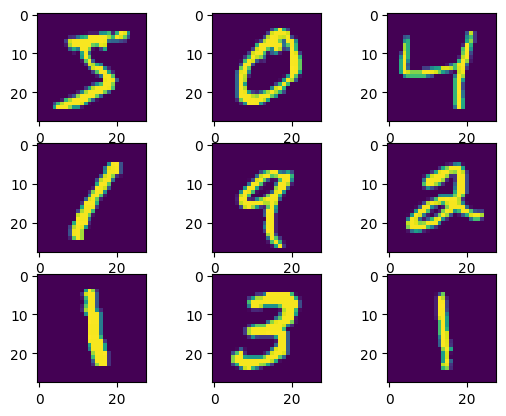

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols , channels = 28, 28, 1
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
    print(y_train[i])
plt.show()

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3
)
datagen.fit(x_train)

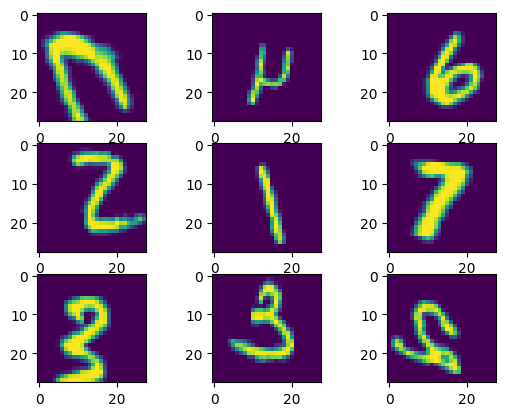

In [5]:
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [6]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
x_train = x_train.astype("float32")  
x_test = x_test.astype("float32")
mean = np.mean(x_train)
std = np.std(x_train)
x_test = (x_test-mean)/std
x_train = (x_train-mean)/std

In [8]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [9]:
ids = np.random.choice(40000, 10000, replace = False)
idsTrain = [i for i in range(40000) if i not in ids]
x_val = x_train[ids]
y_val = y_train[ids]
x_train = x_train[idsTrain]
y_train = y_train[idsTrain]

In [10]:
num_filters = 28
ac = 'relu'
adm = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001, decay = 0, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08)
opt = adm
drop_dense = 0.5
drop_conv = 0.2

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation = ac, input_shape = (img_rows, img_cols, channels), padding = 'same'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(num_filters, (3, 3), activation = ac, padding = 'same'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(drop_conv))

model.add(Conv2D(2 * num_filters, (3, 3), activation = ac,padding = 'same'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(2 * num_filters, (3, 3), activation = ac,padding = 'same'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(drop_conv))

model.add(Conv2D(4 * num_filters, (3, 3), activation = ac,padding = 'same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4 * num_filters, (3, 3), activation = ac,padding = 'same'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation = ac))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = opt)

In [11]:
modelCheckpoint = ModelCheckpoint('mnist.h5', monitor='val_accuracy', save_best_only = True, verbose=0)

In [12]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = 128),
                              steps_per_epoch = len(x_train) / 128, epochs = 200, validation_data = (x_val, y_val),
                              callbacks = [modelCheckpoint, EarlyStopping(monitor = 'loss', patience = 5)])

Epoch 1/200
234/234 [==============================] - 25s 58ms/step - loss: 0.9633 - accuracy: 0.6996 - val_loss: 10.7161 - val_accuracy: 0.1135
Epoch 2/200
234/234 [==============================] - 13s 54ms/step - loss: 0.3408 - accuracy: 0.8885 - val_loss: 0.1265 - val_accuracy: 0.9609
Epoch 3/200
234/234 [==============================] - 12s 53ms/step - loss: 0.2301 - accuracy: 0.9267 - val_loss: 0.0952 - val_accuracy: 0.9733
Epoch 4/200
234/234 [==============================] - 12s 52ms/step - loss: 0.1923 - accuracy: 0.9394 - val_loss: 0.1061 - val_accuracy: 0.9668
Epoch 5/200
234/234 [==============================] - 13s 55ms/step - loss: 0.1651 - accuracy: 0.9487 - val_loss: 0.0550 - val_accuracy: 0.9833
Epoch 6/200
234/234 [==============================] - 12s 53ms/step - loss: 0.1433 - accuracy: 0.9553 - val_loss: 0.0687 - val_accuracy: 0.9808
Epoch 7/200
234/234 [==============================] - 12s 51ms/step - loss: 0.1320 - accuracy: 0.9573 - val_loss: 0.0715 - val_a

In [13]:
model.save('mnist.h5')

313/313 [==============================] - 1s 2ms/step


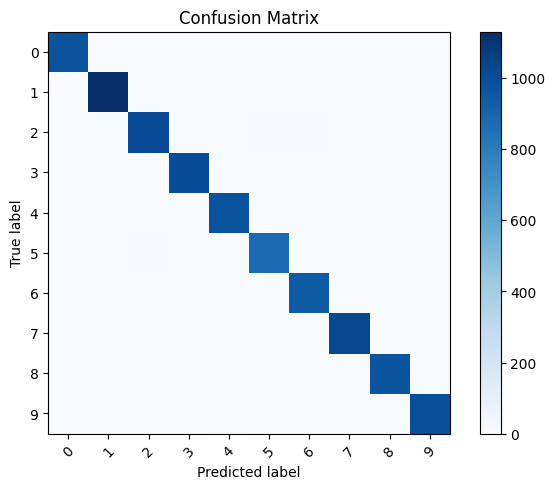

In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.imshow(confusion_mtx, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], rotation = 45)
plt.yticks(tick_marks, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
model_test_acc=model.evaluate(x_test, y_test, batch_size = 128)
model_test_acc

79/79 [==============================] - 0s 5ms/step - loss: 0.0290 - accuracy: 0.9909


[0.028965335339307785, 0.9908999800682068]

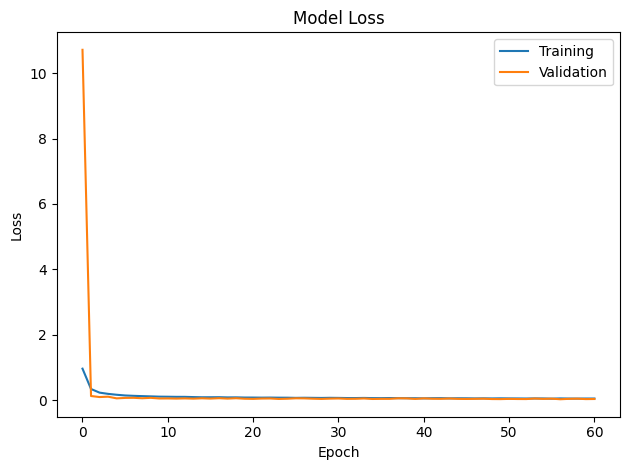

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.tight_layout()
plt.show()

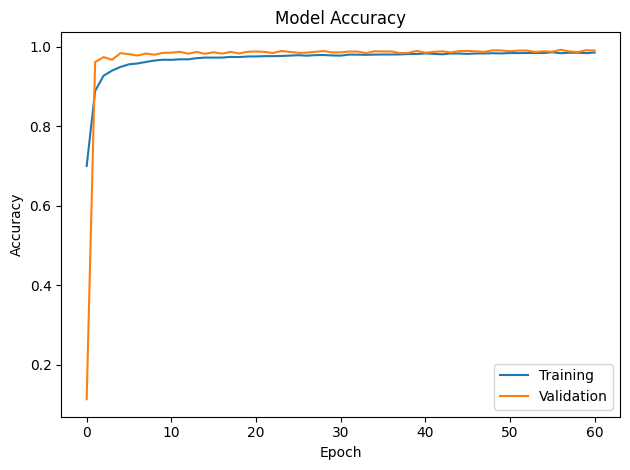

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'lower right')
plt.tight_layout()
plt.show()

In [18]:
import tensorflow as tf
import imageio.v2 as imageio
import cv2
import matplotlib.pyplot as plt
import numpy as np
model = tf.keras.models.load_model('mnist.h5')

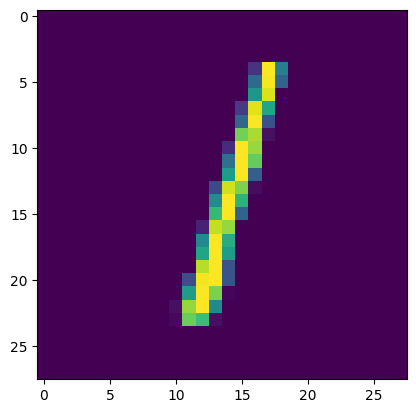

In [19]:
index = 2
img = x_test[index]
plt.imshow(img)

In [20]:
print(img.shape)
img = img.reshape(1, 28, 28, 1)
y_hat = model.predict(img)
np.argmax(y_hat)

(28, 28, 1)
1/1 [==============================] - 0s 330ms/step


1

(500, 500, 4)


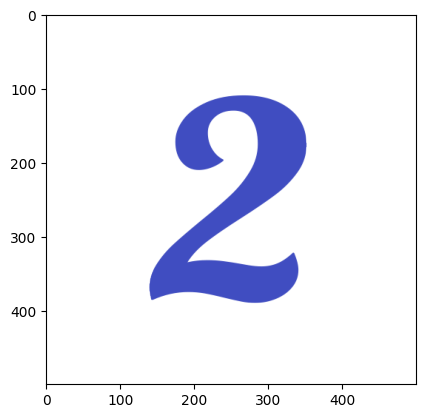

In [21]:
img = imageio.imread('so2.png')
print(img.shape)
plt.imshow(img)

(28, 28, 4)
(1, 28, 28, 1)


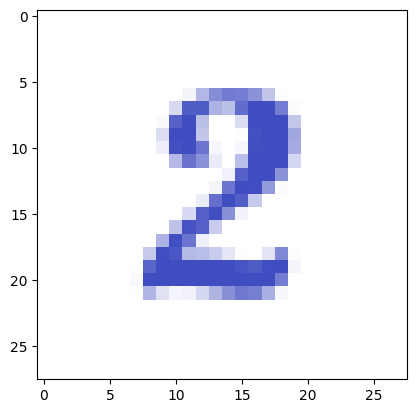

In [22]:
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
print(img.shape)
plt.imshow(img)

img = img[:, :, 0]
img = np.reshape(img, (1, 28, 28, 1))
print(img.shape)

img = img.astype("float32")  
mean = np.mean(img)
std = np.std(img)
img = (img - mean)/std

In [23]:
y_hat = model.predict(img)
np.argmax(y_hat)

1/1 [==============================] - 0s 28ms/step


3

(1280, 1280, 3)


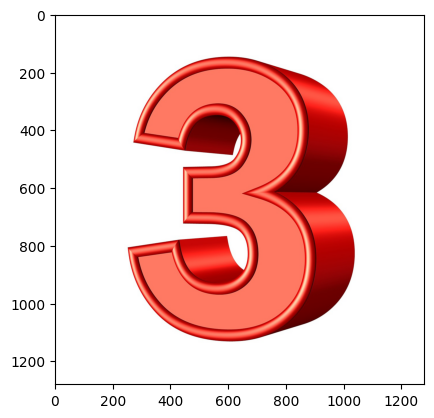

In [24]:
img = imageio.imread('so3.jpg')
print(img.shape)
plt.imshow(img)

(28, 28, 3)
(1, 28, 28, 1)


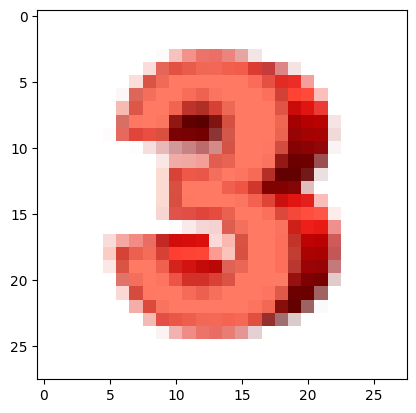

In [25]:
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
print(img.shape)
plt.imshow(img)

img = img[:, :, 0]
img = np.reshape(img, (1, 28, 28, 1))
print(img.shape)

img = img.astype("float32")  
mean = np.mean(img)
std = np.std(img)
img = (img - mean)/std

In [26]:
y_hat = model.predict(img)
np.argmax(y_hat)

1/1 [==============================] - 0s 31ms/step


3